In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
energy_df = pd.read_csv("../data/london_energy.csv")
energy_df

,LCLid,Date,KWH
0,MAC000002,2012-10-12,7.098
1,MAC000002,2012-10-13,11.087
2,MAC000002,2012-10-14,13.223
3,MAC000002,2012-10-15,10.257
4,MAC000002,2012-10-16,9.769
...,...,...,...
3510428,MAC005567,2014-02-24,4.107
3510429,MAC005567,2014-02-25,5.762
3510430,MAC005567,2014-02-26,5.066
3510431,MAC005567,2014-02-27,3.217


In [28]:
weather_df = pd.read_csv("../data/london_weather.csv")
weather_df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


/var/folders/1x/yrtkq1t524l6pz53mvdg298r0000gn/T/ipykernel_690/2489679893.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  weather_df.hist(grid=True, ax=ax)


array([[<AxesSubplot: title={'center': 'date'}>,
        <AxesSubplot: title={'center': 'cloud_cover'}>,
        <AxesSubplot: title={'center': 'sunshine'}>],
       [<AxesSubplot: title={'center': 'global_radiation'}>,
        <AxesSubplot: title={'center': 'max_temp'}>,
        <AxesSubplot: title={'center': 'mean_temp'}>],
       [<AxesSubplot: title={'center': 'min_temp'}>,
        <AxesSubplot: title={'center': 'precipitation'}>,
        <AxesSubplot: title={'center': 'pressure'}>],
       [<AxesSubplot: title={'center': 'snow_depth'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

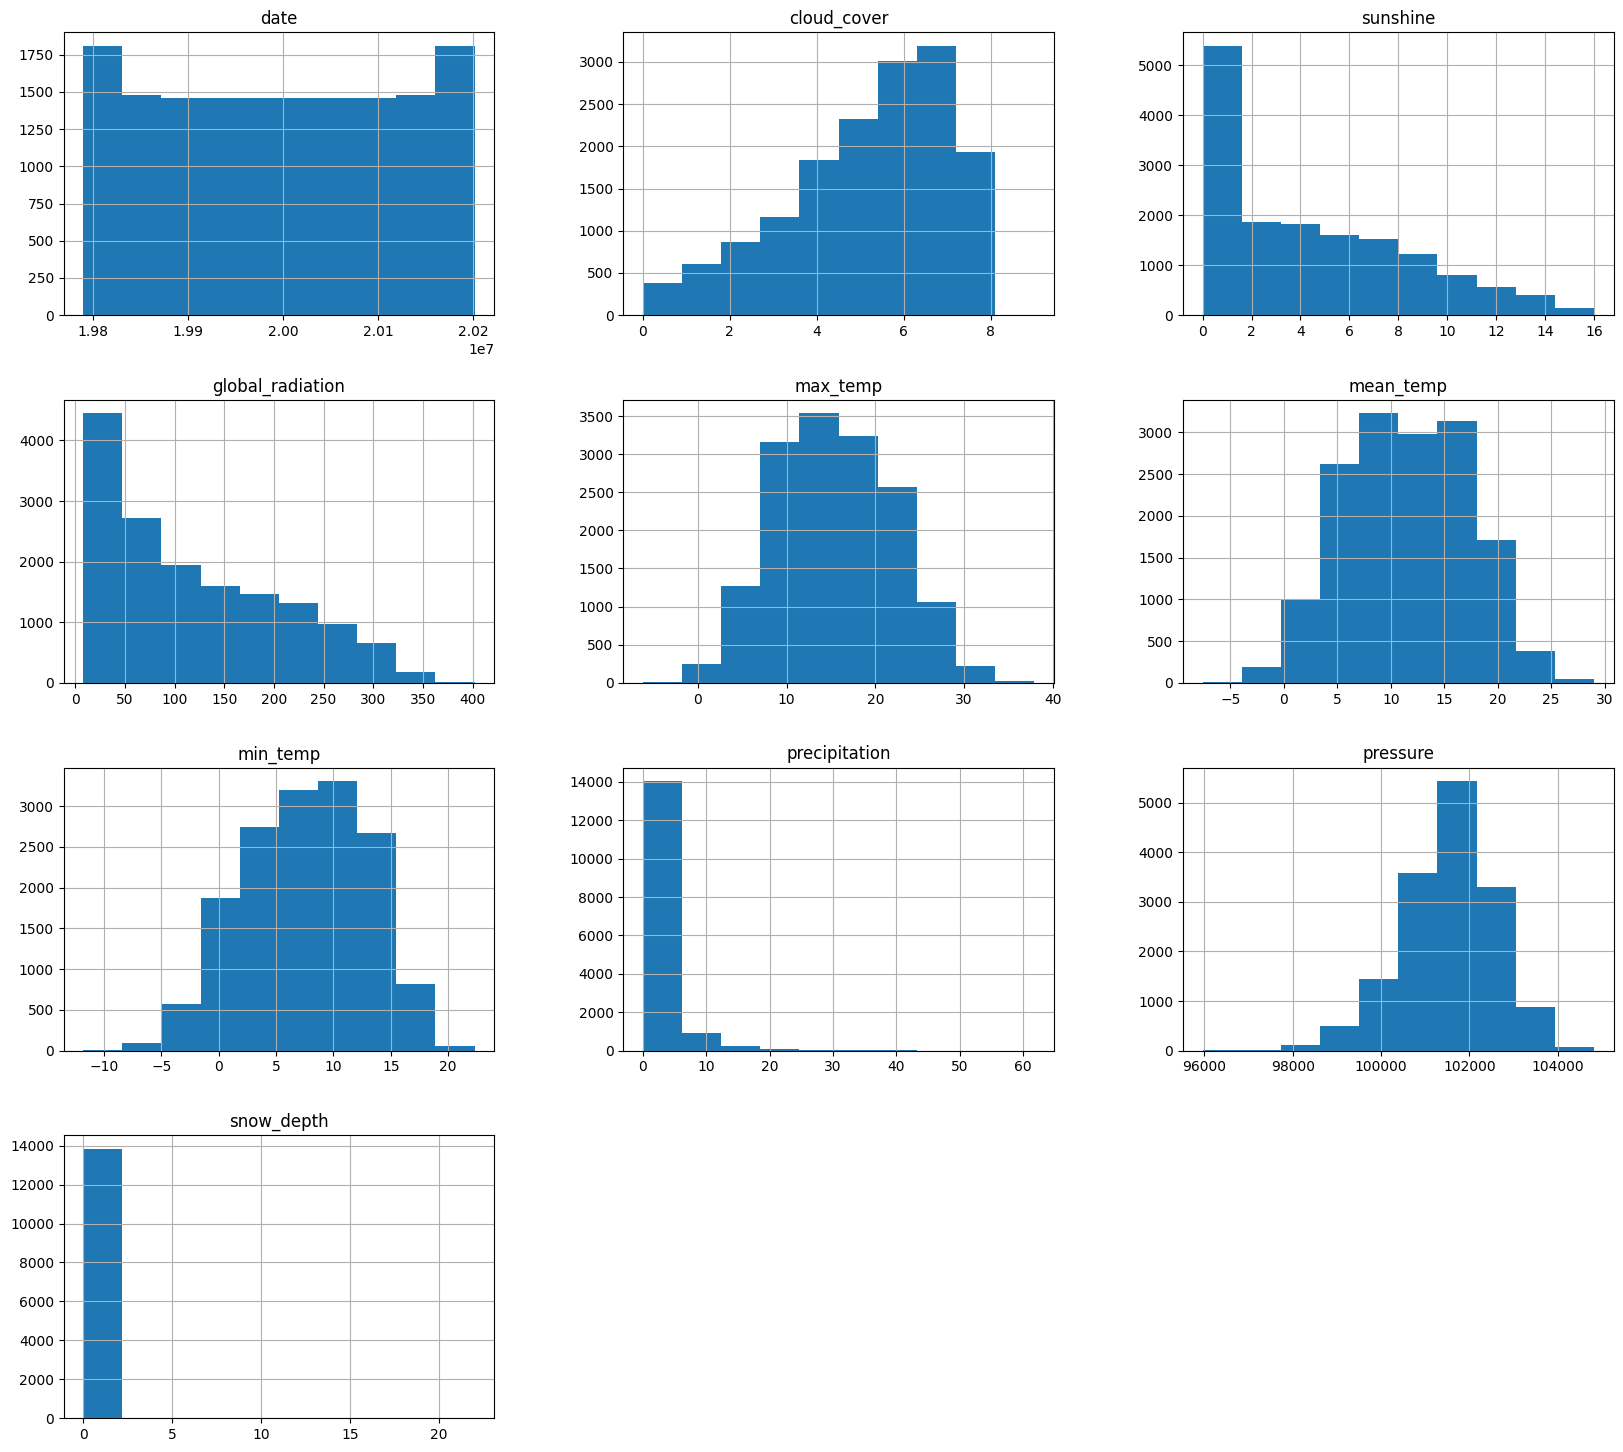

In [5]:
fig, ax = plt.subplots(figsize=(20, 18))
weather_df.hist(grid=True, ax=ax)

<AxesSubplot: >

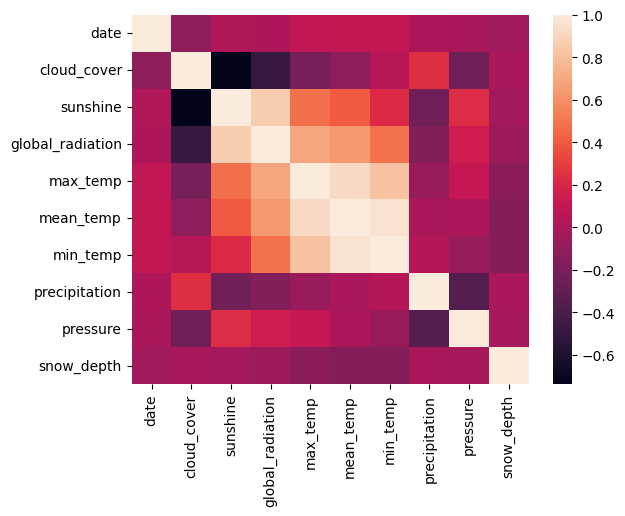

In [6]:
sns.heatmap(weather_df.corr())

/var/folders/1x/yrtkq1t524l6pz53mvdg298r0000gn/T/ipykernel_690/2169294082.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.histplot(energy_df.groupby("LCLid", axis=0).aggregate("mean"))


<AxesSubplot: ylabel='Count'>

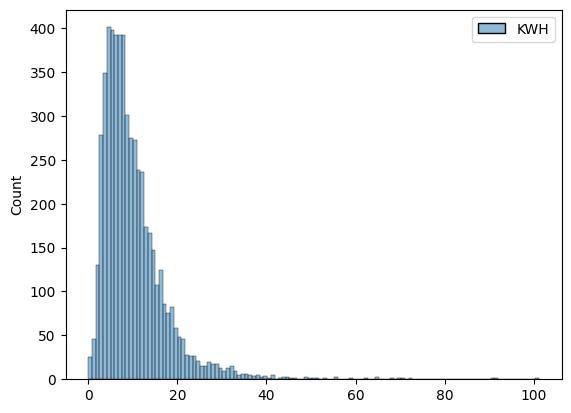

In [7]:
sns.histplot(energy_df.groupby("LCLid", axis=0).aggregate("mean"))

Text(0.5, 0, '$\\sigma$')

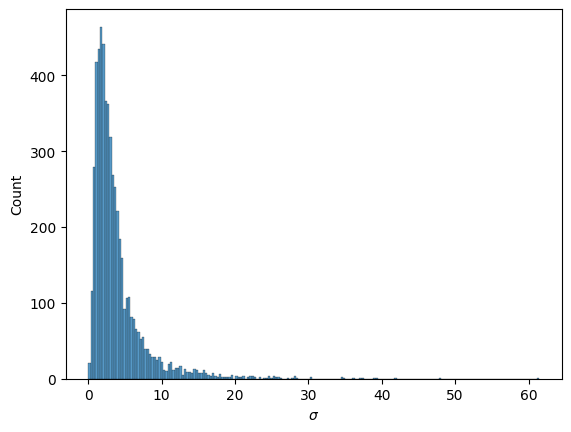

In [8]:
def variance(x):
    """
    Calculate the variance of a household's energy consumption
    """
    mean = sum(x) / len(x)
    return sum((i - mean) ** 2 for i in x) / len(x)

def stdev(x):
    """
    Calculate the standard deviation of a household's energy consumption
    """
    return np.sqrt(variance(x))

sns.histplot(energy_df.drop("Date", axis=1).groupby("LCLid", axis=0).agg(stdev)["KWH"])
plt.xlabel(r"$\sigma$")

In [15]:
energy_df["Date"].describe()

count        3510433
unique           829
top       2012-12-18
freq            5541
Name: Date, dtype: object

In [29]:
weather_df["date_fmt"] = pd.to_datetime(weather_df["date"], format="%Y%m%d")
weather_df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,date_fmt
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05
...,...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN,2020-12-27
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN,2020-12-28
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN,2020-12-29
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN,2020-12-30


/var/folders/1x/yrtkq1t524l6pz53mvdg298r0000gn/T/ipykernel_690/1144041406.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_df.groupby(weather_df["date_fmt"].apply(lambda date: date.year), axis=0).agg("mean").plot(subplots=True, figsize=(20, 18))


array([<AxesSubplot: xlabel='date_fmt'>, <AxesSubplot: xlabel='date_fmt'>,
       <AxesSubplot: xlabel='date_fmt'>, <AxesSubplot: xlabel='date_fmt'>,
       <AxesSubplot: xlabel='date_fmt'>, <AxesSubplot: xlabel='date_fmt'>,
       <AxesSubplot: xlabel='date_fmt'>, <AxesSubplot: xlabel='date_fmt'>,
       <AxesSubplot: xlabel='date_fmt'>, <AxesSubplot: xlabel='date_fmt'>],
      dtype=object)

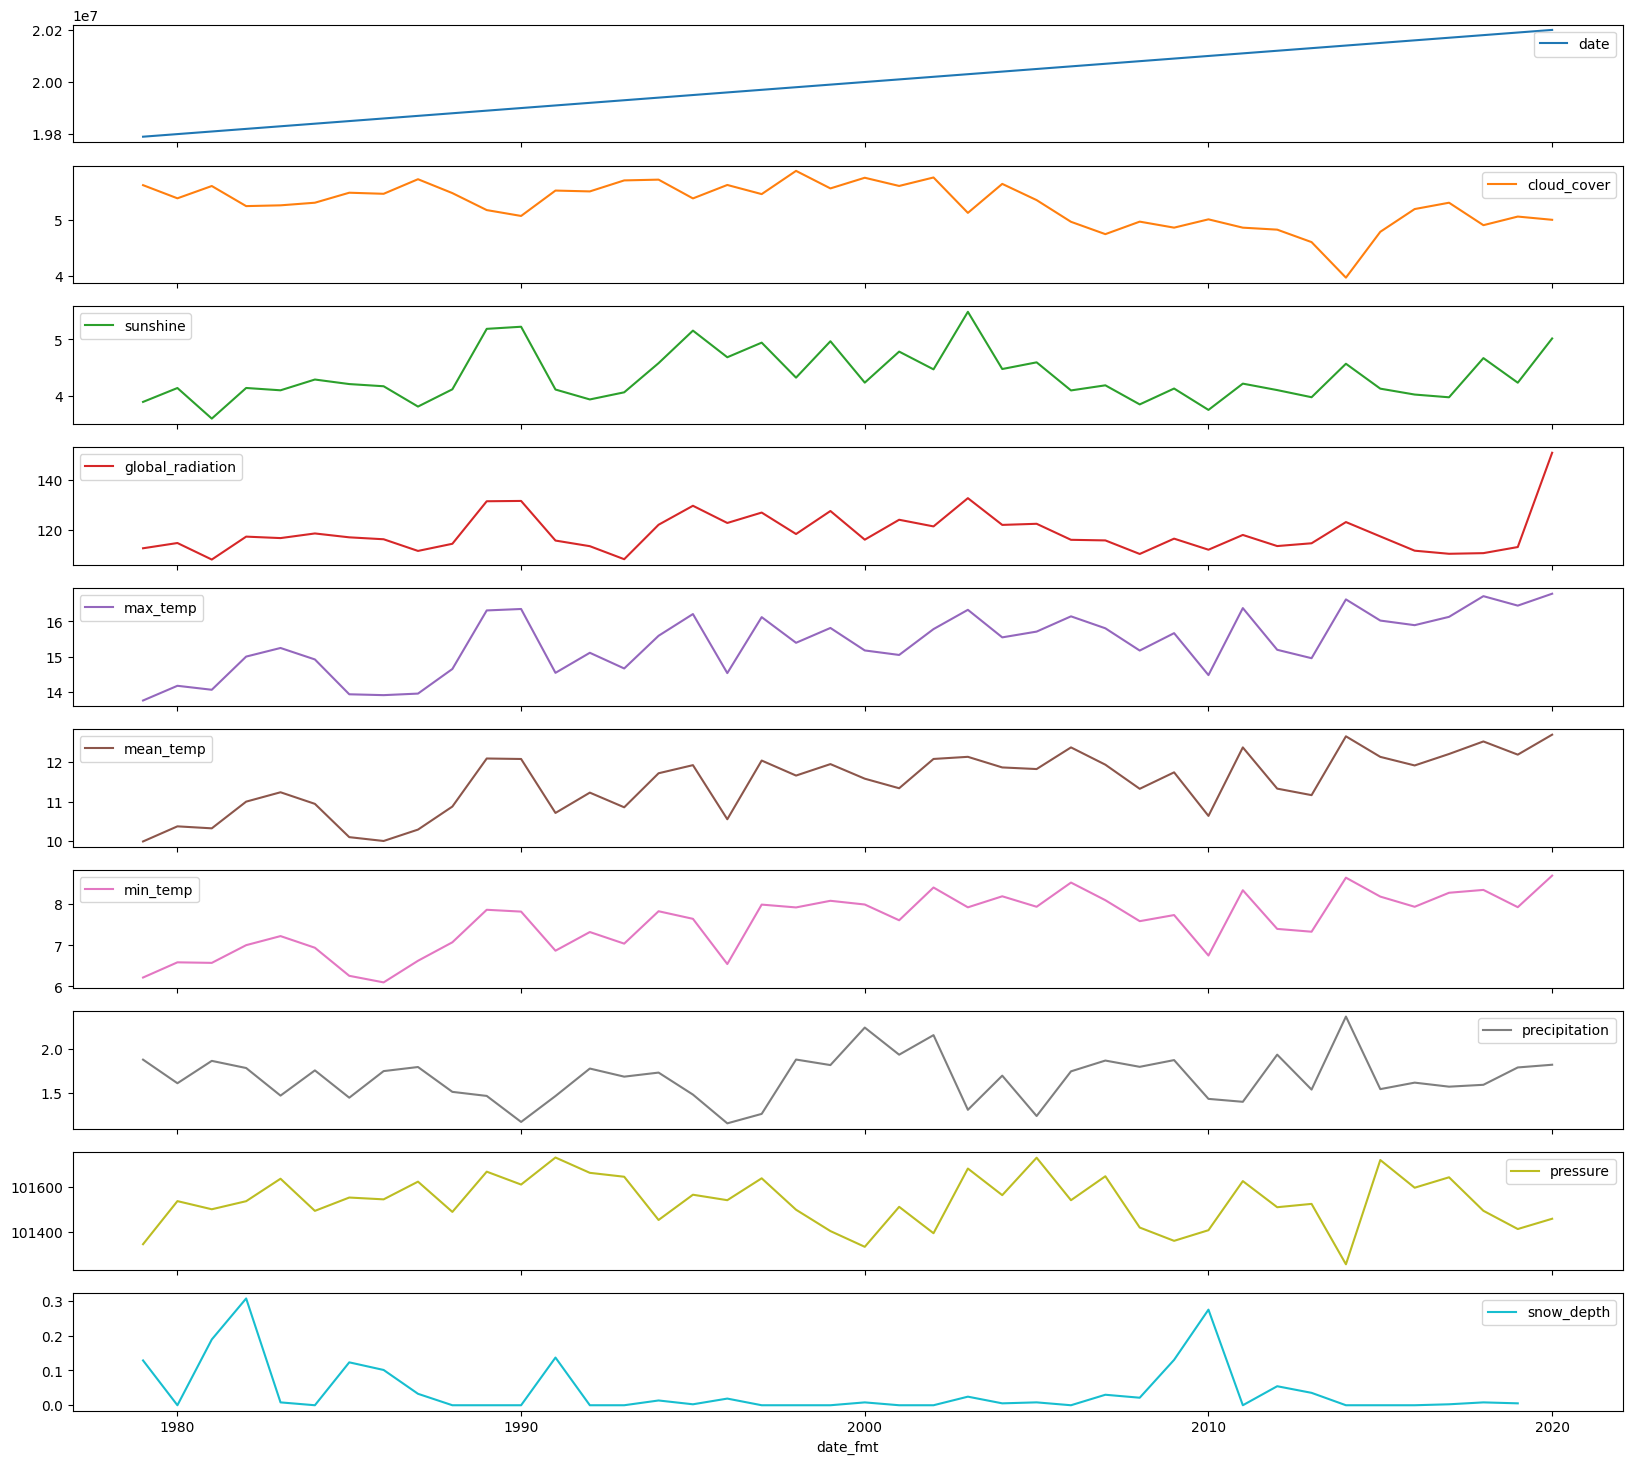

In [49]:
weather_df.groupby(weather_df["date_fmt"].apply(lambda date: date.year), axis=0).agg("mean").plot(subplots=True, figsize=(20, 18))

/var/folders/1x/yrtkq1t524l6pz53mvdg298r0000gn/T/ipykernel_690/1963078849.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_df.groupby(weather_df["date_fmt"].apply(lambda date: date.month), axis=0).agg("mean").plot(subplots=True, figsize=(20, 18))


([<matplotlib.axis.XTick at 0x12415f7f0>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

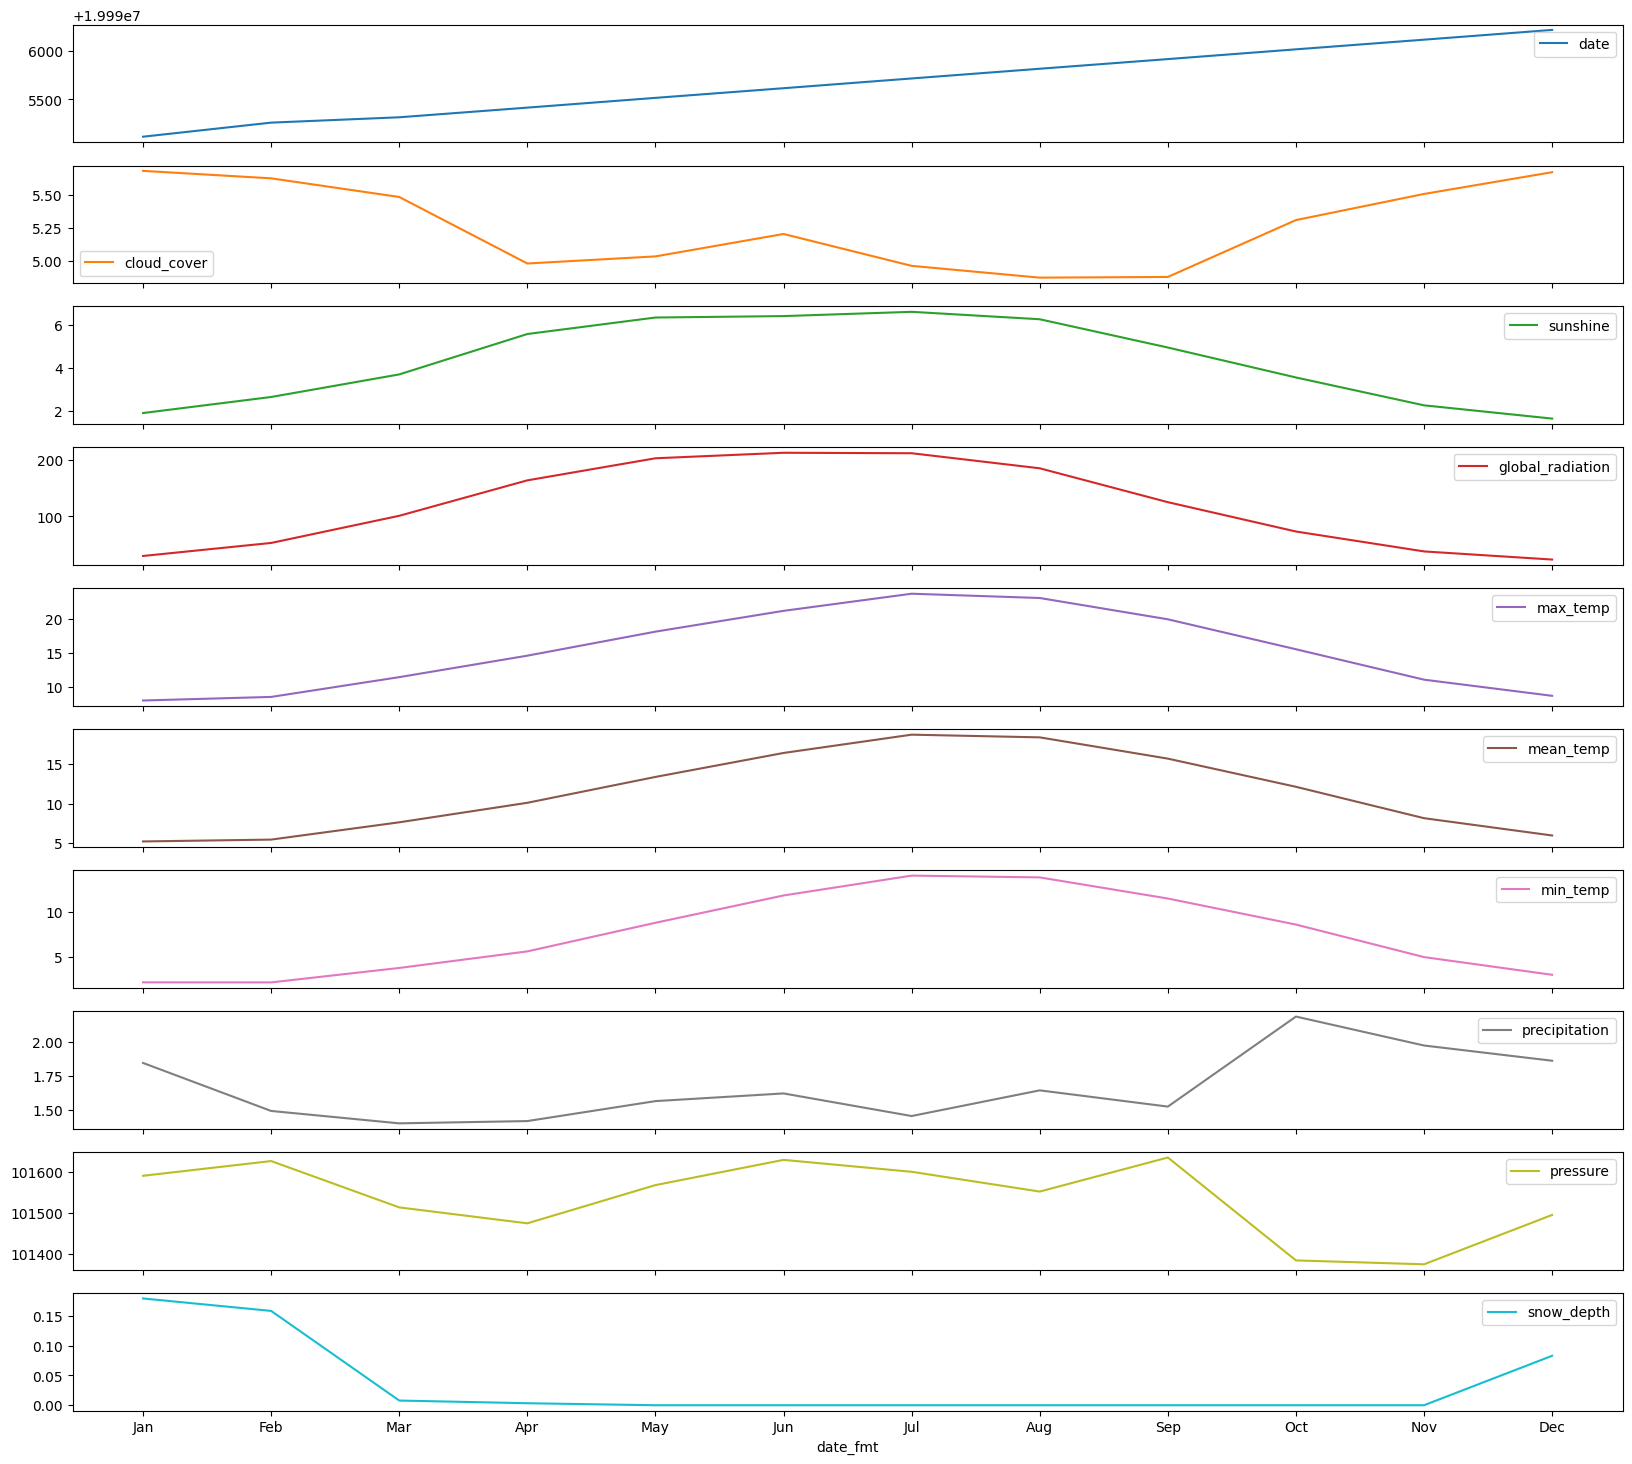

In [55]:
weather_df.groupby(weather_df["date_fmt"].apply(lambda date: date.month), axis=0).agg("mean").plot(subplots=True, figsize=(20, 18))
plt.xticks(ticks=range(1,13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

In [82]:
from datetime import datetime

energy_df["date"] = energy_df["Date"].apply(datetime.strptime, args=("%Y-%m-%d",))

merged_df = pd.merge(weather_df, energy_df, left_on="date_fmt", right_on="date")

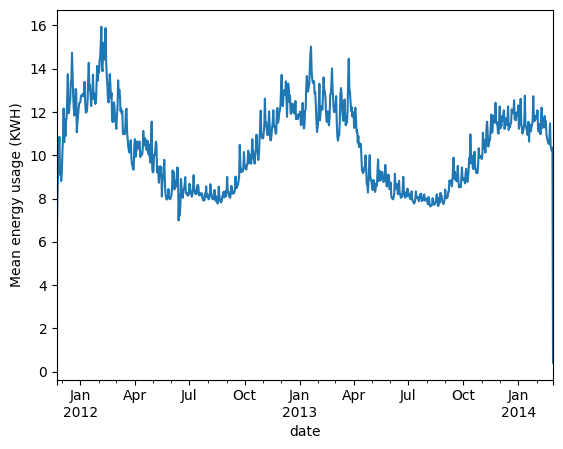

In [86]:
merged_df.groupby("date_y")["KWH"].agg("mean").plot()
plt.ylabel("Mean energy usage (KWH)")
plt.xlabel("date")
plt.show()

Text(0, 0.5, 'mean energy usage (KWH)')

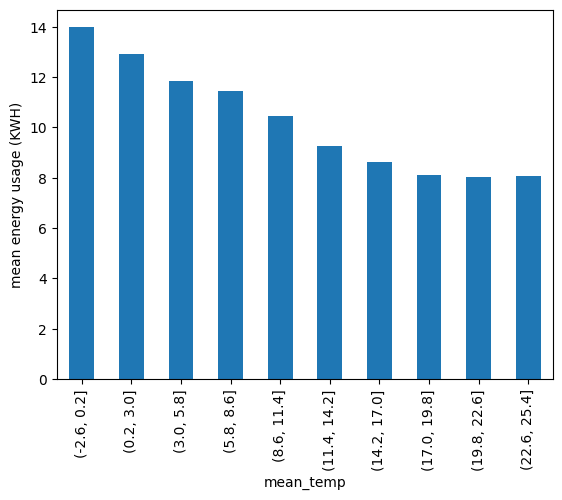

In [117]:
_, bins = np.histogram(merged_df["mean_temp"])
bins = pd.cut(merged_df["mean_temp"], bins)
merged_df.groupby(bins)["KWH"].agg("mean").plot(kind="bar")
plt.ylabel("mean energy usage (KWH)")

{'precipitation', 'pressure', 'sunshine', 'max_temp', 'cloud_cover', 'global_radiation', 'snow_depth', 'min_temp', 'mean_temp'}


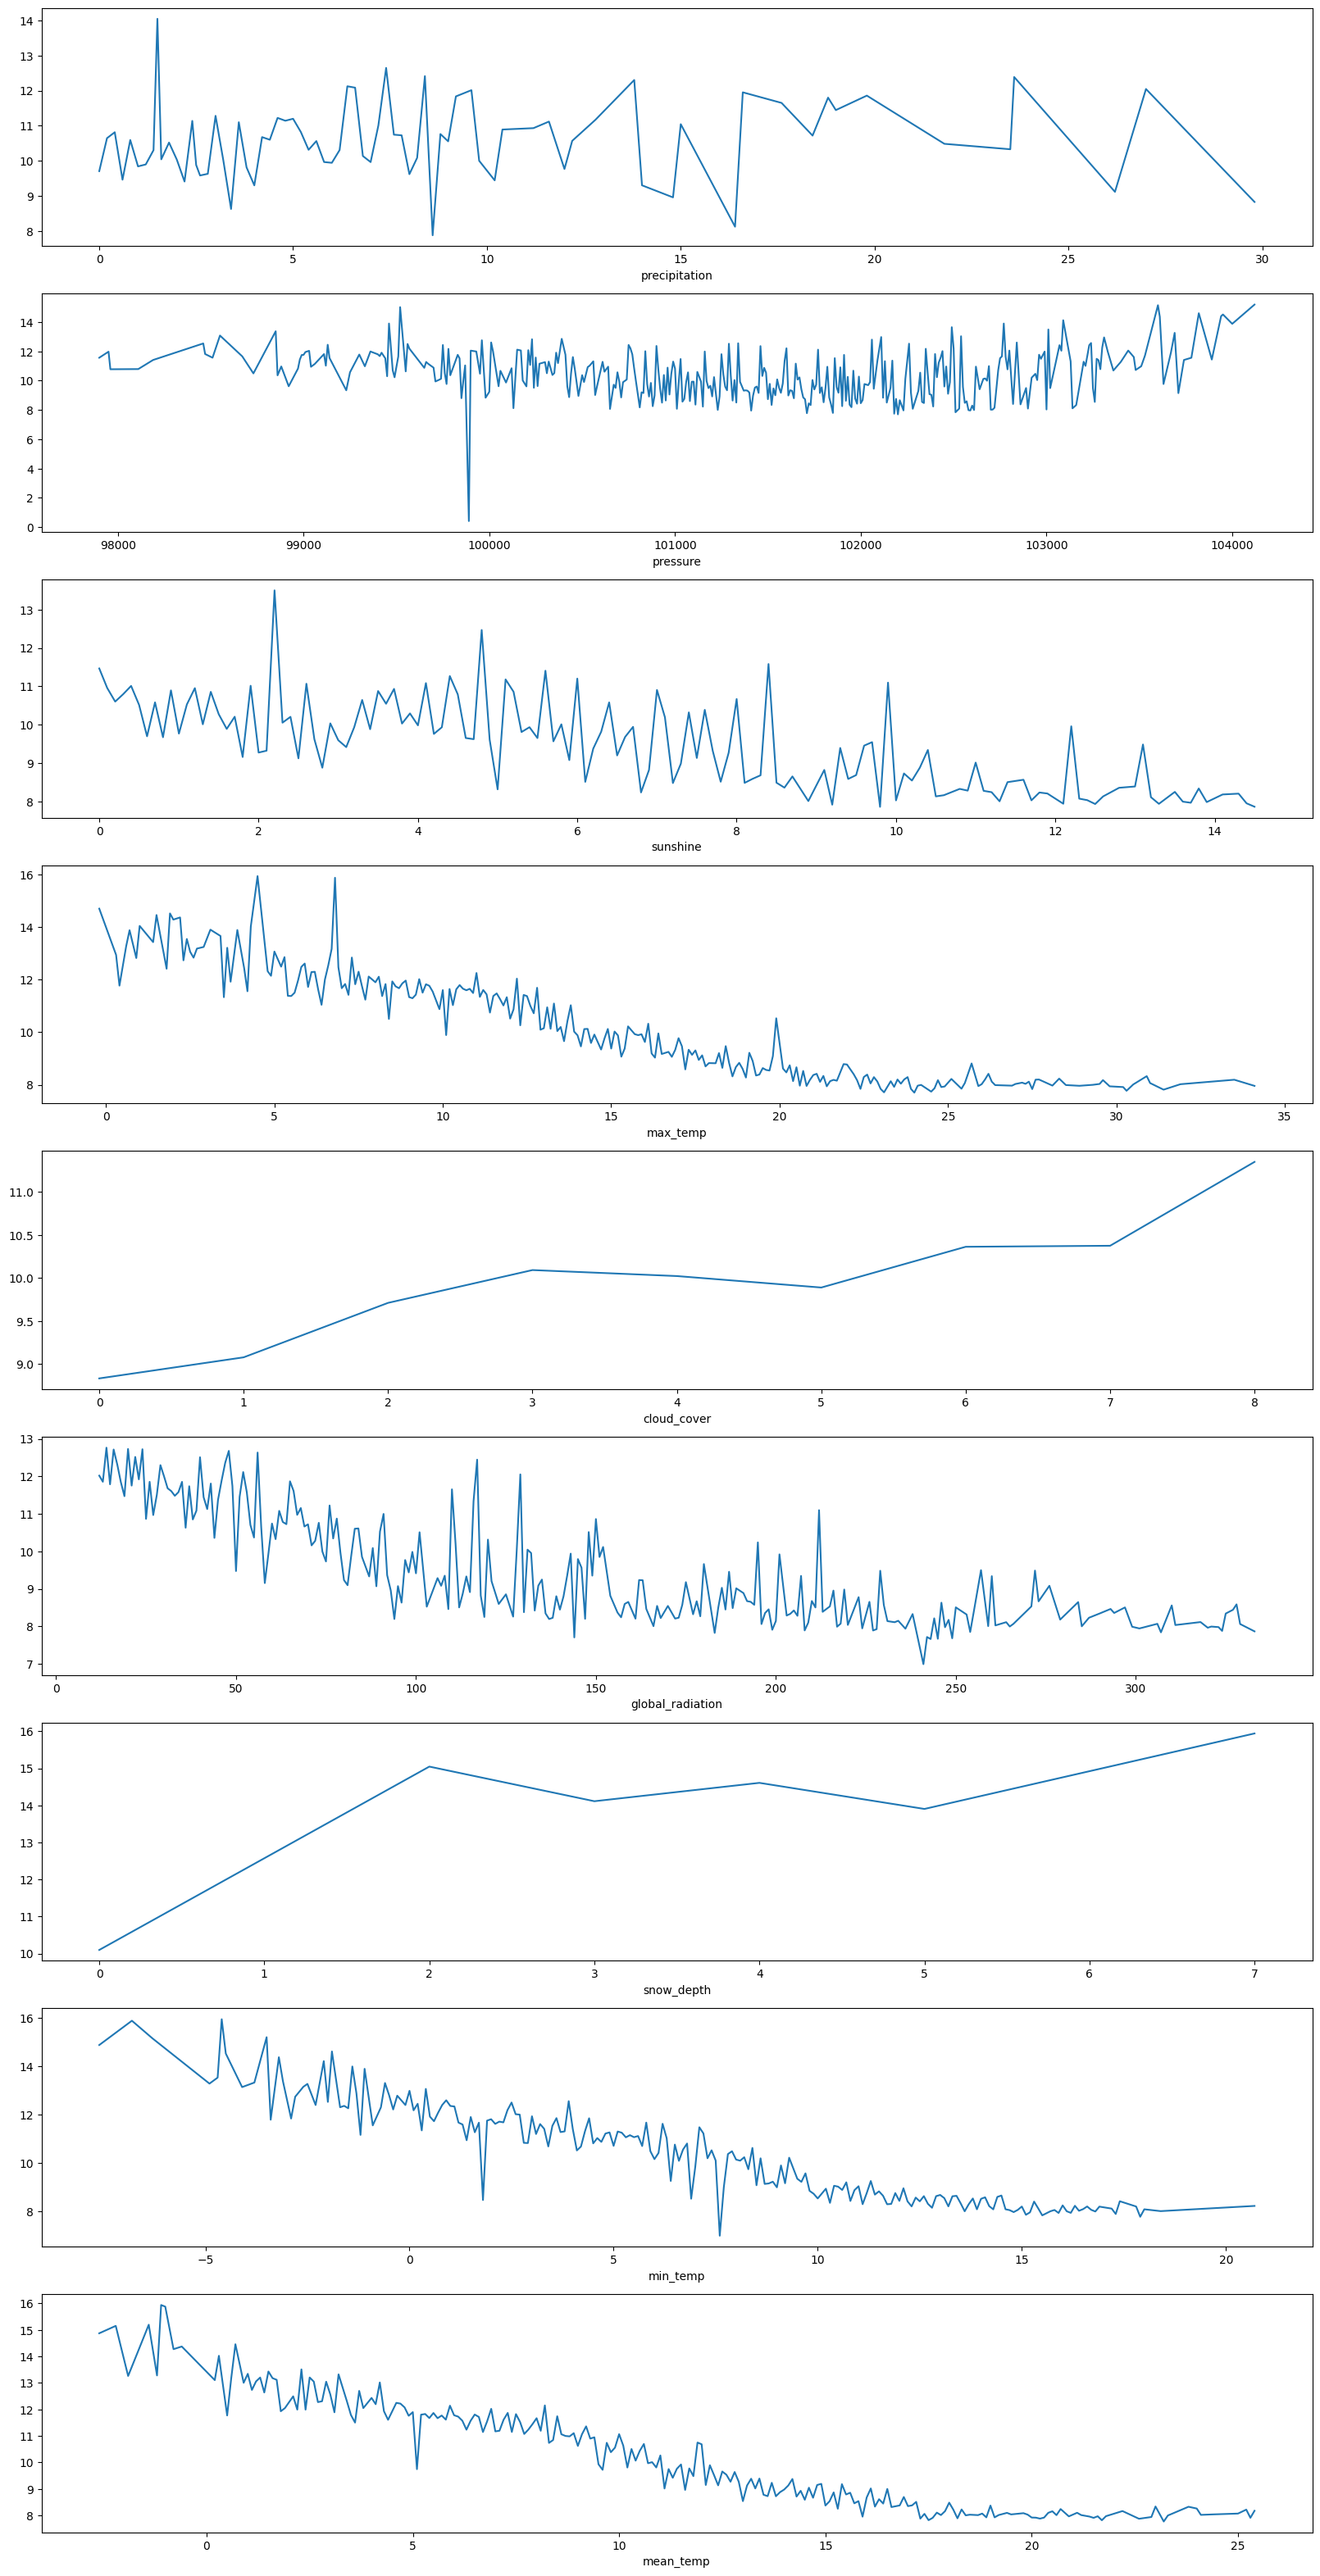

In [170]:
feature_cols = set(merged_df.columns) - {"date_x", "LCLid", "date_fmt", "date_y", "Date", "KWH"}
print(feature_cols)
fig, axes = plt.subplots(9, 1, figsize=(20, 40), sharex=False, sharey=True)
for col, ax in zip(feature_cols, axes, strict=True):
    merged_df.groupby(col)["KWH"].agg("mean").plot(ax=ax)

In [163]:
merged_df[merged_df.isna().any(axis=1)]

,date_x,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,date_fmt,LCLid,Date,KWH,date_y
44873,20120302,NaN,3.4,88.0,15.0,7.5,3.2,0.0,102560.0,0.0,2012-03-02,MAC000003,2012-03-02,11.323,2012-03-02
44874,20120302,NaN,3.4,88.0,15.0,7.5,3.2,0.0,102560.0,0.0,2012-03-02,MAC000006,2012-03-02,2.873,2012-03-02
44875,20120302,NaN,3.4,88.0,15.0,7.5,3.2,0.0,102560.0,0.0,2012-03-02,MAC000015,2012-03-02,24.971,2012-03-02
44876,20120302,NaN,3.4,88.0,15.0,7.5,3.2,0.0,102560.0,0.0,2012-03-02,MAC000016,2012-03-02,2.927,2012-03-02
44877,20120302,NaN,3.4,88.0,15.0,7.5,3.2,0.0,102560.0,0.0,2012-03-02,MAC000017,2012-03-02,6.883,2012-03-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45731,20120302,NaN,3.4,88.0,15.0,7.5,3.2,0.0,102560.0,0.0,2012-03-02,MAC005420,2012-03-02,2.935,2012-03-02
45732,20120302,NaN,3.4,88.0,15.0,7.5,3.2,0.0,102560.0,0.0,2012-03-02,MAC005421,2012-03-02,20.475,2012-03-02
45733,20120302,NaN,3.4,88.0,15.0,7.5,3.2,0.0,102560.0,0.0,2012-03-02,MAC005422,2012-03-02,9.545,2012-03-02
45734,20120302,NaN,3.4,88.0,15.0,7.5,3.2,0.0,102560.0,0.0,2012-03-02,MAC005423,2012-03-02,42.218,2012-03-02
